# What is image Classification?
Image classification is a fundamental task in computer vision that involves assigning a label or category to an entire image based on its content. The goal is to recognize and identify the main object or feature in the image. For example, given an image of a cat, the classification system should output "cat."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define your folder structure
data_dir = '/content/drive/MyDrive/Fall 2024/CSE463-01 Lab | Fall 2024/CSE463 [Student]/Lab Classwork/Lab 4/dataset'
classes = ['cats', 'dogs']

#Dataset source: https://www.kaggle.com/datasets/tongpython/cat-and-dog?resource=download-directory

Load and pre-process

In [ ]:
# Load and preprocess image data
def load_and_preprocess_data(data_dir, classes, target_shape=(128, 128)):
    data = []
    labels = []

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg'):
                file_path = os.path.join(class_dir, filename)
                # Load and preprocess the image
                img = load_img(file_path, target_size=target_shape)
                img_array = img_to_array(img)
                data.append(img_array)
                labels.append(i)

    return np.array(data), np.array(labels)

# Split data into training and testing sets
data, labels = load_and_preprocess_data(data_dir, classes)
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


Custom model VGG16


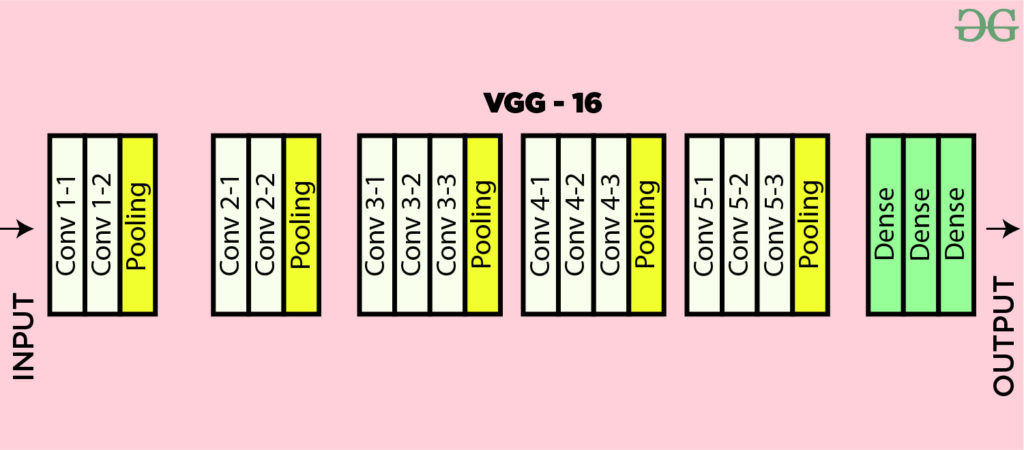

In [ ]:

# Define input shape
input_shape = X_train[0].shape  # Input shape based on your data

# Define the input layer
input_layer = Input(shape=input_shape)

# VGG16 Architecture (Custom Version)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Flatten the output from the convolutional layers
x = Flatten()(x)

# Fully connected layers
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
output_layer = Dense(len(classes), activation='softmax')(x)  # Adjust based on number of classes

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      33,558,528 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 65,062,722 (248.19 MB)

 Trainable params: 65,062,722 (248.19 MB)

 Non-trainable params: 0 (0.00 B)

Train and save

In [ ]:
# Train the model and store the training history
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model on the test set
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy[1]}')

# Save the model
model.save('image_classification_model.h5')


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 68s 715ms/step - accuracy: 0.4955 - loss: 446.4663 - val_accuracy: 0.5108 - val_loss: 0.6929
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - accuracy: 0.4890 - loss: 0.6934 - val_accuracy: 0.5108 - val_loss: 0.6931
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - accuracy: 0.4695 - loss: 0.6934 - val_accuracy: 0.5108 - val_loss: 0.6930
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - accuracy: 0.5110 - loss: 0.7005 - val_accuracy: 0.5108 - val_loss: 0.6929
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.4970 - loss: 0.6936 - val_accuracy: 0.5108 - val_loss: 0.6930
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - accuracy: 0.4973 - loss: 0.6932 - val_accuracy: 0.5108 - val_loss: 0.6930
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5108 - val_loss: 0.6930
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - accuracy: 0.5133 - loss: 0.6931 - val_ac

Test accuracy: 0.5108054876327515


Plot Accuracy

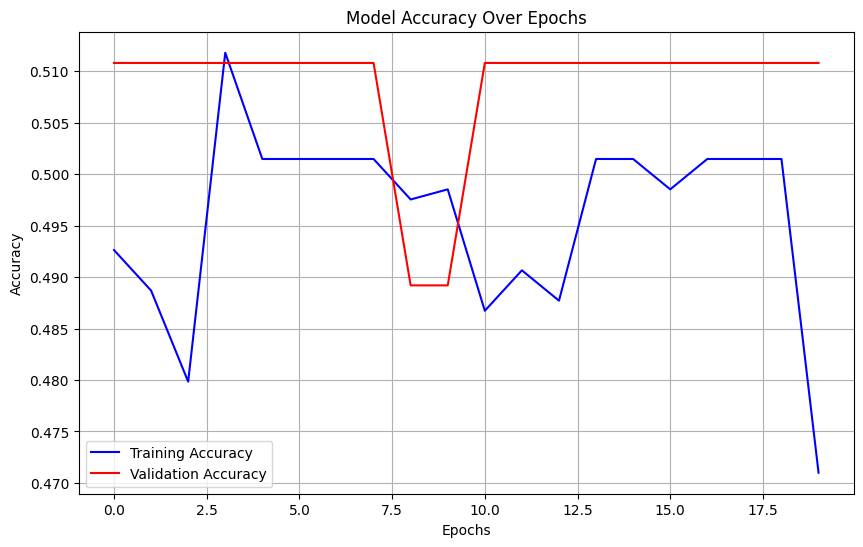

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Test

In [ ]:
# Load the saved model
model = load_model('image_classification_model.h5')

# Define the target shape for input images
target_shape = (128, 128)  # Adjust this to match the target shape used during training

# Define your class labels
classes = ['cat', 'dog']

# Function to preprocess and classify an image file
def test_image(file_path, model):
    # Load and preprocess the image
    img = load_img(file_path, target_size=target_shape)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values to [0, 1]

    # Make predictions
    predictions = model.predict(img_array)

    # Get the class probabilities
    class_probabilities = predictions[0]

    # Get the predicted class index
    predicted_class_index = np.argmax(class_probabilities)

    return class_probabilities, predicted_class_index

# Test an image file

test_image_file = '/content/drive/MyDrive/Fall 2024/CSE463-01 Lab | Fall 2024/CSE463 [Student]/Lab Classwork/Lab 4/dataset/test2.jpg'
class_probabilities, predicted_class_index = test_image(test_image_file, model)

# Display results for all classes
for i, class_label in enumerate(classes):
    probability = class_probabilities[i]
    print(f'Class: {class_label}, Probability: {probability:.4f}')

# Calculate and display the predicted class
predicted_class = classes[predicted_class_index]
print(f'The image is classified as: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
Class: cat, Probability: 0.5008
Class: dog, Probability: 0.4992
The image is classified as: cat


#Using Pre-trained Models

VGG19

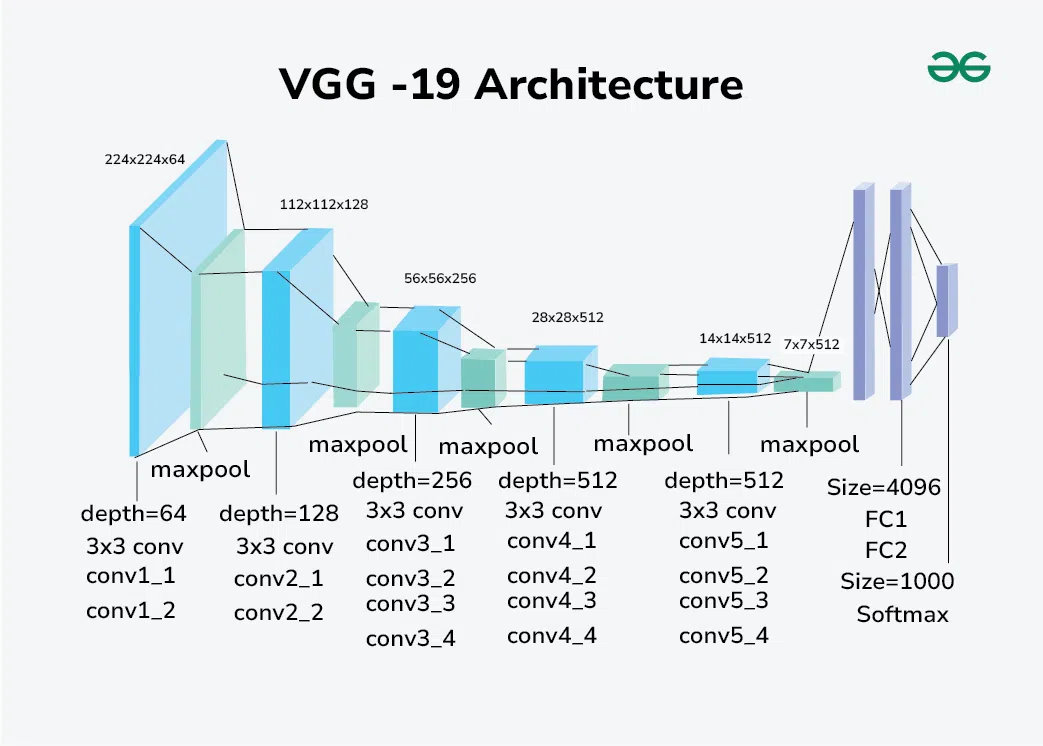

1. Uniform Convolution Filters: Consistently using 3x3 convolution filters simplifies the architecture and helps maintain uniformity.
2. Deep Architecture: Increasing the depth of the network enables learning more complex features.
3. ReLU Activation: Introducing non-linearity helps in learning complex patterns.
4. Max Pooling: Reduces the spatial dimensions while preserving important features.
5. Fully Connected Layers: Combines the learned features for classification.
6. Softmax: Final layer for outputting class probabilities.

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam

# Define input shape
input_shape = X_train[0].shape

# Load the VGG19 model without the top layer and with pre-trained ImageNet weights
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the VGG19 base layers to retain pre-trained features
vgg19_base.trainable = False

# Add custom layers on top
x = Flatten()(vgg19_base.output)
x = Dense(64, activation='relu')(x)  # Fully connected layer
output_layer = Dense(len(classes), activation='softmax')(x)  # Output layer for classification

# Create the complete model
model = Model(inputs=vgg19_base.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Summary of the model
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model on the test set
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy[1]}')

# Save the model
model.save('vgg19_classification_model.h5')

ResNet50

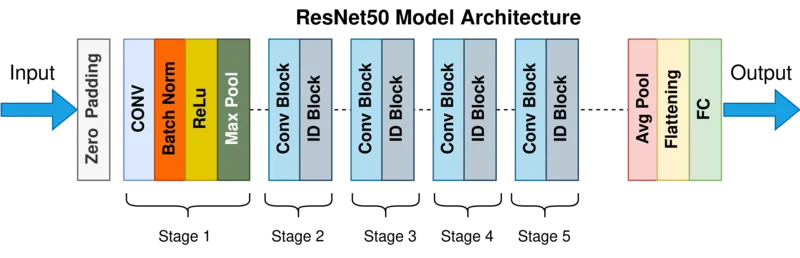

 1. The convolutional layers are responsible for extracting features from the input image
 2. The identity block and convolutional block are responsible for processing and transforming these features.
 3. The fully connected layers are used to make the final classification.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam

# Load ResNet50 without the top layer
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the ResNet base layers
resnet_base.trainable = False

# Add custom layers
x = Flatten()(resnet_base.output)
x = Dense(64, activation='relu')(x)
output_layer = Dense(len(classes), activation='softmax')(x)

# Create model
model = Model(inputs=resnet_base.input, outputs=output_layer)

# Compile and train the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Summary of the model
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate the model on the test set
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy[1]}')

# Save the model
model.save('vgg19_classification_model.h5')

The implementation shown above is a very simplified version of cat dog classification. I suggest you go though another example here: https://keras.io/examples/vision/image_classification_from_scratch/


# What is Image Segmentation?

Image segmentation is a computer vision technique that involves partitioning an image into meaningful regions or segments to simplify its representation and make it easier to analyze. The goal is to identify and separate objects or areas of interest within an image. It’s widely used in applications like medical imaging, object detection, autonomous driving, and scene understanding.

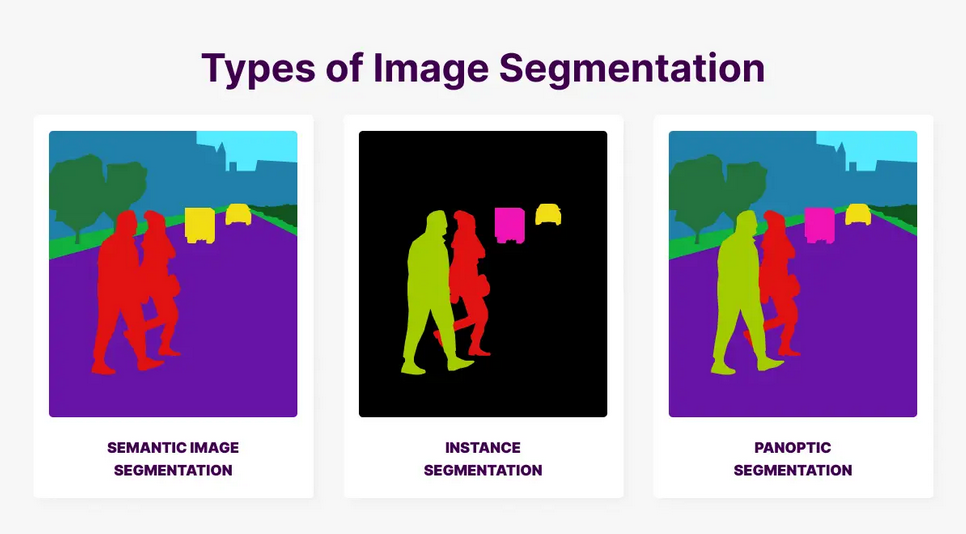

Image segmentation can be done in several different ways. Below you will find some of the most common techniques:

1. Semantic image segmentation — this involves arranging the pixels in an image based on semantic class.
2. Instance segmentation — this technique involves classifying pixels based on the instances of an object instead of classes.
3. Panoptic segmentation — panoptic segmentation is a newer technique than the previous two mentioned above and is often expressed as a combination of semantic and instance segmentation. It predicts the identity of each object, separating every instance of each object in the image.

But there are various image segmentation techniques. Such as- Edge-Based Segmentation, Threshold-Based Segmentation, Region-Based Segmentation, Cluster-Based Segmentation etc. You can read more here: https://mindy-support.com/news-post/what-is-image-segmentation-the-basics-and-key-techniques/



Understand that segmentation can be done using photo editor for labeling such as MATLAB, photoshop, or machine learning models.


#Semantic segmentation models

Semantic segmentation models are used to classify objects in images. The list below includes a few popular segmentation models:

1. Pyramid Scene Parsing Network (PSPNet). PSPNet uses a pyramid parsing module to discern multi-level features for a more comprehensive context of an image. It’s capable of processing global and local information.
2. Fully Convolutional Network (FCN). FCNs have notably less dense layers than traditional CNNs, shortening the training process.
3. SegNet. SegNet is a semantic segmentation model comprising an encoder network, a decoder network, and a classification layer.

Reading:

https://faculty.cc.gatech.edu/~hays/compvision/lectures/22.pdf

https://www.superannotate.com/blog/guide-to-semantic-segmentation
